In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(data_url, sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


understand the significance of feature by consulting with the experts 

In [3]:
feature_list = df.columns[:-1].values
label = [df.columns[-1]]

print('feature_list : ', feature_list)
print('label : ', label)

feature_list :  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
label :  ['quality']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df['quality'].value_counts()
# higher quality --> better wine 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

values are centered mostly around 5 and 6 

### EDA

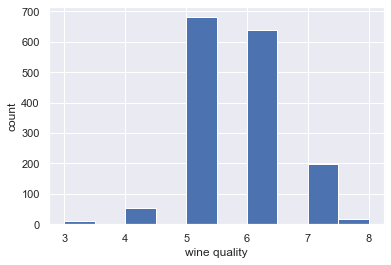

In [8]:
sns.set()
df.quality.hist()
plt.xlabel('wine quality')
plt.ylabel('count');

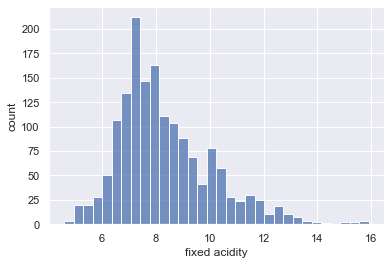

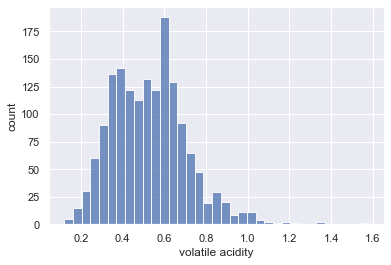

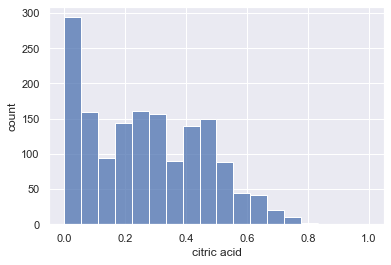

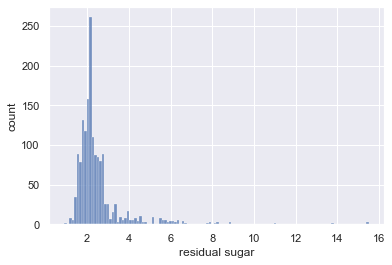

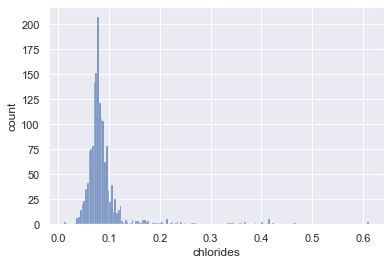

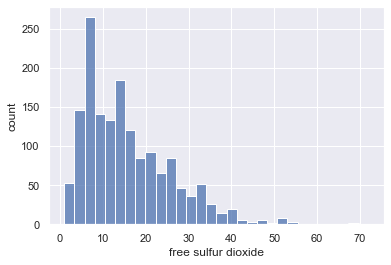

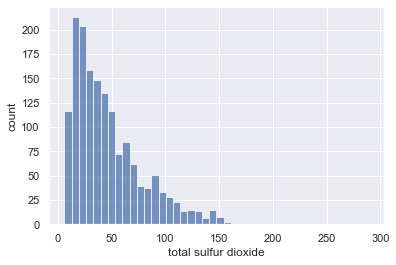

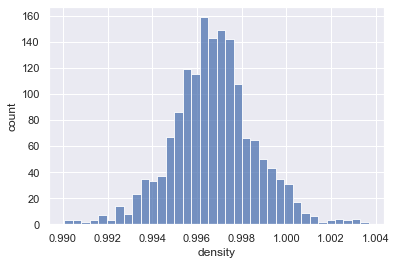

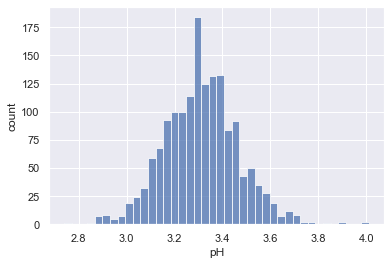

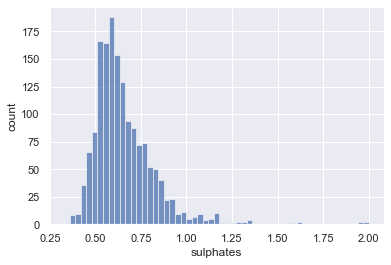

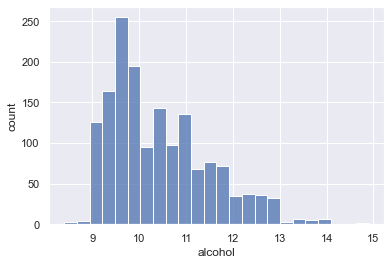

In [9]:
for column in df.columns[:-1] : 
    sns.set()
    sns.histplot(data=df, x=column)
    plt.xlabel(column)
    plt.ylabel('count');
    plt.show();

data snooping bias ==> if we select models based on pattrens in the test set 

In [10]:
def split_train_test(data, test_ratio) :
    np.random.seed(42)

    # generates a shuffled number list from 0 - n-1
    shuffled_indces = np.random.permutation(len(data))

    # select test size wrt the dataset 
    test_set_size = int(len(data) * test_ratio)

    # split indices for test and train dataset 
    test_indices = shuffled_indces[:test_set_size] 
    train_indices = shuffled_indces[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(df, 0.2)
test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,5
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,6


scatter plot 

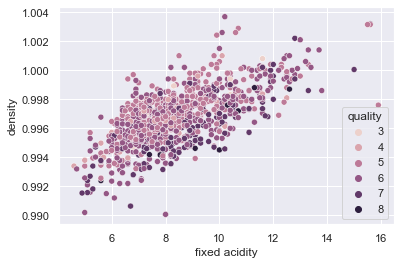

In [16]:
exploration_set = train_set.copy()
sns.scatterplot(
    x = 'fixed acidity', y = 'density', 
    hue = 'quality', data = exploration_set
);

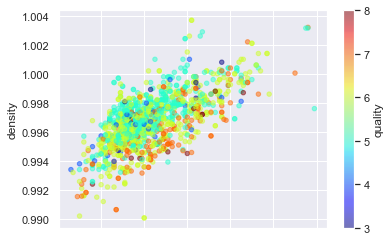

In [21]:
exploration_set.plot(
    kind = 'scatter', x = 'fixed acidity', y = 'density', alpha = 0.5, 
    c = 'quality', cmap = plt.get_cmap('jet')
);

In [23]:
corr_matrix = exploration_set.corr()
corr_matrix['quality']

fixed acidity           0.122488
volatile acidity       -0.378372
citric acid             0.216115
residual sugar          0.005425
chlorides              -0.126541
free sulfur dioxide    -0.055860
total sulfur dioxide   -0.200067
density                -0.167091
pH                     -0.045185
sulphates               0.242596
alcohol                 0.472676
quality                 1.000000
Name: quality, dtype: float64

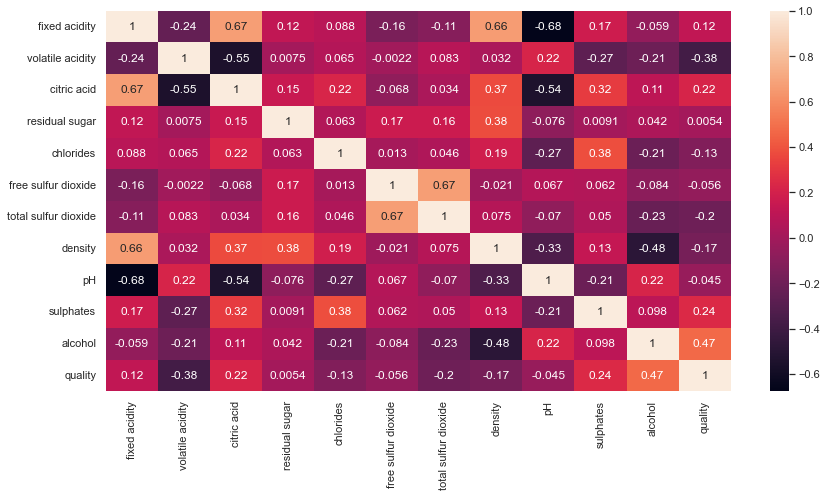

In [25]:
plt.figure(figsize = (14, 7))
sns.heatmap(corr_matrix, annot=True);

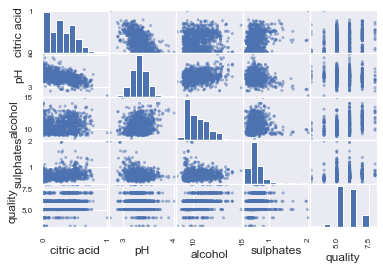

In [29]:
from pandas.plotting import scatter_matrix
attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
scatter_matrix(exploration_set[attribute_list]);

In [12]:
train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
704,9.1,0.765,0.04,1.6,0.078,4.0,14.0,0.99800,3.29,0.54,9.7,4
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5


In [13]:
from sklearn.model_selection import train_test_split
# ?train_test_split
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

* when data distributions are not uniform we use stratified sampling
* random sample introduces biases in the dataframe 

here wine quality is not uniform 

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
# n_splits : int, default=10
#     Number of re-shuffling & splitting iterations.
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
print(split)
for train_index, test_index in split.split(df, df['quality']) : 
    # print(train_index, test_index)
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)


In [16]:
strat_data = strat_test_set['quality'].value_counts()/len(strat_test_set)
print(strat_data)

5    0.425000
6    0.400000
7    0.125000
4    0.034375
8    0.009375
3    0.006250
Name: quality, dtype: float64


In [17]:
overall_dist = df['quality'].value_counts()/len(df)
print(overall_dist)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64


stratified sampling is much more similar to overall distribution than random sampling 

In [18]:
random_dist = test_set['quality'].value_counts()/len(test_set)
print(random_dist)

6    0.412500
5    0.406250
7    0.131250
4    0.031250
8    0.015625
3    0.003125
Name: quality, dtype: float64


comparison of random sampling and stratified sampling with overall distribution 

* in smaller classes the difference is more 

In [19]:
dist_comparison = pd.DataFrame({'overall' : overall_dist, 'stratified' : strat_data, 'random' : random_dist})
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(r-o)'] = dist_comparison['random'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100*(dist_comparison['diff(s-o)']/dist_comparison['overall'])
dist_comparison['diff(r-o)_pct'] = 100*(dist_comparison['diff(r-o)']/dist_comparison['overall'])
dist_comparison.sort_values('overall', ascending = False)

,overall,stratified,random,diff(s-o),diff(r-o),diff(s-o)_pct,diff(r-o)_pct
5,0.425891,0.425000,0.406250,-0.000891,-0.019641,-0.209251,-4.611784
6,0.398999,0.400000,0.412500,0.001001,0.013501,0.250784,3.383621
7,0.124453,0.125000,0.131250,0.000547,0.006797,0.439698,5.461683
4,0.033146,0.034375,0.031250,0.001229,-0.001896,3.708726,-5.719340
8,0.011257,0.009375,0.015625,-0.001882,0.004368,-16.718750,38.802083
3,0.006254,0.006250,0.003125,-0.000004,-0.003129,-0.062500,-50.031250


In [20]:
wine_features = strat_train_set.drop('quality', axis = 1)
wine_label = strat_train_set['quality'].copy()

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [22]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [23]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

cross checking median by simple inputer and median on df 

In [24]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [25]:
tr_features = imputer.transform(wine_features)

In [26]:
tr_features.shape # np.array 

(1279, 11)

In [27]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns)
wine_features_tr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.7,0.855,0.02,1.90,0.064,29.0,38.0,0.99472,3.30,0.56,10.75
1,6.9,0.630,0.33,6.70,0.235,66.0,115.0,0.99787,3.22,0.56,9.50
2,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.70
3,8.6,0.470,0.27,2.30,0.055,14.0,28.0,0.99516,3.18,0.80,11.20
4,10.4,0.260,0.48,1.90,0.066,6.0,10.0,0.99724,3.33,0.87,10.90
...,...,...,...,...,...,...,...,...,...,...,...
1274,8.9,0.480,0.53,4.00,0.101,3.0,10.0,0.99586,3.21,0.59,12.10
1275,6.4,0.570,0.14,3.90,0.070,27.0,73.0,0.99669,3.32,0.48,9.20
1276,7.8,0.430,0.32,2.80,0.080,29.0,58.0,0.99740,3.31,0.64,10.30
1277,11.2,0.500,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.20


In [28]:
from sklearn.preprocessing import OrdinalEncoder 
ordinal_encoder = OrdinalEncoder()

# here ml algorithm will assume that the two nearby values are closer than the distinct ones

In [29]:
from sklearn.preprocessing import OneHotEncoder 
one_hot_encoder = OneHotEncoder()

# to convert it to dense representation we use toarray()
# convert into low-dim learnable vectors called embeddings

In [30]:
# scaling of target is not required 
# min max scaling --> 0 - 1
# standardization has no specific range --> less affected by outliers

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# pipeline exposes the same method as the final estimator 
# here the ast estimator is StandardScaler() so we call fit_transform()
transform_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= 'median')), 
    ('std_scaler', StandardScaler()),])

wine_features_tr = transform_pipeline.fit_transform(wine_features)

```py
# apply num_pipeline to numerical features and oneHotEncoder to categorical features and finally concatinate the two results
from sklearn.compose import ColumnTransformer

num_attribs = list(wine_features)
cat_attribs = ['place_of_manufacturing']
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs), 
    ('cat', OneHotEncoder(), cat_attribs)
])

wine_features_tr = full_pipeline.fit_transform(wine_features)
```

if all transformers doesn't return same num of rows then we might face problems while concatinating 

### baseline model 

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_label)

LinearRegression()

In [33]:
from sklearn.metrics import mean_squared_error

quality_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_label, quality_predictions)

0.4206571060060278

In [34]:
wine_features_test = strat_test_set.drop('quality', axis = 1)

wine_label_test = strat_test_set['quality'].copy()

wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_label_test, quality_test_predictions)

0.3975913087501518

In [35]:
quality_test_predictions[:5] # value are not int 

array([6.31093765, 5.45601362, 5.15376606, 5.60536568, 5.57371497])

model is makinh errors in the best and the worst quality wines 

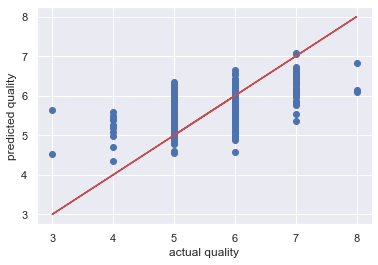

In [36]:
plt.scatter(wine_label_test, quality_test_predictions)
plt.plot(wine_label_test, wine_label_test, 'r-')
plt.xlabel('actual quality')
plt.ylabel('predicted quality');

In [37]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_label)

DecisionTreeRegressor()

the training error is 0, which is an example of overfitting

In [38]:
quality_predictions = tree_reg.predict(wine_features_tr)
mean_squared_error(wine_label, quality_predictions)

0.0

In [39]:
quality_test_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_label_test, quality_test_predictions)

0.58125

In [40]:
quality_test_predictions #here we get int prediction 

array([6., 6., 4., 5., 5., 6., 6., 5., 5., 7., 5., 7., 6., 6., 6., 5., 5.,
       6., 7., 6., 6., 6., 6., 6., 6., 6., 7., 5., 7., 5., 5., 5., 6., 6.,
       7., 5., 5., 6., 5., 5., 5., 5., 6., 6., 7., 6., 8., 6., 6., 5., 5.,
       7., 6., 6., 6., 5., 4., 6., 5., 6., 5., 6., 5., 6., 7., 5., 6., 5.,
       5., 7., 7., 6., 6., 6., 4., 7., 6., 7., 5., 6., 4., 5., 6., 5., 5.,
       5., 5., 7., 8., 6., 5., 6., 6., 7., 5., 6., 5., 5., 5., 5., 8., 7.,
       7., 7., 7., 6., 6., 7., 7., 6., 5., 4., 5., 5., 6., 6., 5., 6., 8.,
       6., 7., 4., 6., 6., 6., 6., 6., 5., 5., 7., 6., 5., 5., 5., 6., 6.,
       4., 7., 5., 6., 5., 5., 6., 5., 5., 7., 5., 7., 5., 6., 6., 5., 4.,
       6., 5., 3., 5., 5., 7., 5., 7., 6., 5., 6., 5., 8., 6., 6., 4., 6.,
       7., 5., 5., 7., 6., 5., 6., 5., 5., 7., 5., 5., 5., 6., 5., 5., 7.,
       5., 6., 7., 7., 5., 5., 5., 6., 7., 7., 5., 5., 5., 7., 5., 6., 5.,
       6., 6., 5., 5., 7., 6., 5., 5., 5., 6., 7., 5., 5., 5., 6., 4., 6.,
       4., 5., 5., 5., 6.

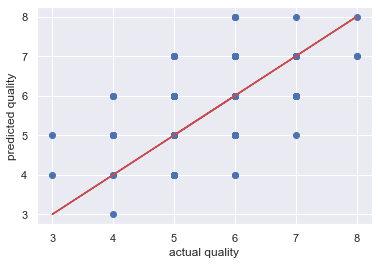

In [41]:
plt.scatter(wine_label_test, quality_test_predictions)
plt.plot(wine_label_test, wine_label_test, 'r-')
plt.xlabel('actual quality')
plt.ylabel('predicted quality');

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
def display_scores(scores) : 
    print('scores : ', scores)
    print('mean : ', scores.mean())
    print('standard deviation : ', scores.std())

In [44]:
scores = cross_val_score(
    lin_reg, wine_features_tr, 
    wine_label, scoring = 'neg_mean_squared_error', 
    cv= 10)

lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

scores :  [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
mean :  0.431639217212196
standard deviation :  0.08356359730413963


lin_reg has better scores than tree_reg 

In [45]:
scores = cross_val_score(
    tree_reg, wine_features_tr, 
    wine_label, scoring = 'neg_mean_squared_error', 
    cv= 10)

tree_reg_mse_scores = -scores
display_scores(tree_reg_mse_scores)

scores :  [0.6171875  0.6875     0.6328125  0.5078125  0.4609375  0.640625
 0.65625    0.7109375  0.859375   1.07874016]
mean :  0.6852177657480315
standard deviation :  0.16668343331737054


sd is much less than the prev 2 models 

In [46]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_label)

scores = cross_val_score(
    forest_reg, wine_features_tr, 
    wine_label, scoring = 'neg_mean_squared_error', 
    cv= 10)

forest_reg_mse_scores = -scores
display_scores(forest_reg_mse_scores)

scores :  [0.36989922 0.41363672 0.29063438 0.31722344 0.21798125 0.30233828
 0.27124922 0.38747344 0.42379219 0.46229449]
mean :  0.34565226131889765
standard deviation :  0.0736322184302973


In [47]:
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_label_test, quality_test_predictions)

0.34449875

In [48]:
quality_test_predictions # float values 

array([6.69, 5.63, 4.93, 5.7 , 5.31, 6.29, 5.44, 4.86, 5.33, 6.89, 5.04,
       5.69, 5.25, 5.14, 5.37, 5.73, 5.52, 5.1 , 6.77, 6.03, 5.75, 5.89,
       5.83, 5.64, 5.32, 5.51, 5.65, 5.66, 6.28, 4.98, 5.52, 4.92, 6.37,
       5.98, 7.11, 5.39, 5.24, 6.32, 5.19, 5.72, 5.19, 5.61, 5.51, 6.14,
       6.42, 6.27, 6.73, 6.04, 5.3 , 5.28, 4.98, 6.32, 5.07, 6.  , 6.21,
       4.87, 4.96, 5.48, 5.24, 5.57, 5.79, 5.82, 5.51, 6.09, 6.08, 5.24,
       6.01, 5.58, 5.1 , 5.81, 6.23, 5.75, 6.25, 5.57, 4.71, 6.22, 5.9 ,
       6.04, 5.1 , 6.46, 5.21, 5.62, 5.27, 5.04, 5.  , 5.05, 5.38, 5.69,
       6.88, 5.35, 5.34, 5.22, 5.78, 6.47, 5.47, 5.78, 5.12, 5.17, 6.  ,
       4.89, 6.77, 6.86, 6.75, 6.46, 5.76, 6.33, 6.32, 6.76, 6.72, 6.09,
       5.08, 5.05, 5.27, 5.45, 5.65, 5.96, 5.56, 5.15, 6.73, 5.71, 6.48,
       5.71, 6.21, 5.88, 5.88, 6.2 , 6.46, 5.11, 5.05, 6.52, 5.28, 5.41,
       4.48, 5.55, 6.31, 6.37, 5.03, 6.05, 5.  , 5.75, 5.09, 5.13, 5.19,
       5.12, 5.04, 6.63, 5.32, 5.97, 5.15, 5.74, 6.

extreme ones are again giving poor results here but still better than the prev 2 

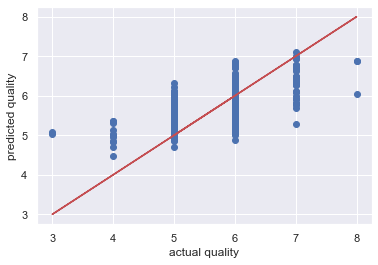

In [49]:
plt.scatter(wine_label_test, quality_test_predictions)
plt.plot(wine_label_test, wine_label_test, 'r-')
plt.xlabel('actual quality')
plt.ylabel('predicted quality');

#### Hyper parameter tuning :

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {
        'n_estimators' : [3, 10, 30], 
        'max_features' : [2, 4, 6, 8]
    }, # 3 * 4 = 12 combinations 
    {
        'bootstrap' : [False], 
        'n_estimators' : [3, 10], 
        'max_features' : [2, 3, 4]
    }, # 2*3 = 6 combinations 
] # 6 + 12 = 18 combinations 

In [51]:
grid_search = GridSearchCV(
    forest_reg, param_grid, cv = 5, 
    scoring = 'neg_mean_squared_error', 
    return_train_score = True, verbose = 2
) # 18 * 5 = 90 --> total training runs 

In [52]:
grid_search.fit(wine_features_tr, wine_label)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=30; total time=   0.0s
[CV] END ....................max_features=2, n_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [53]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [54]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']) : 
    print(-mean_score, params)

0.5096674155773421 {'max_features': 2, 'n_estimators': 3}
0.38494794730392157 {'max_features': 2, 'n_estimators': 10}
0.35890284926470584 {'max_features': 2, 'n_estimators': 30}
0.4765907543572984 {'max_features': 4, 'n_estimators': 3}
0.37949047181372547 {'max_features': 4, 'n_estimators': 10}
0.3677285709422658 {'max_features': 4, 'n_estimators': 30}
0.47674223856209147 {'max_features': 6, 'n_estimators': 3}
0.39086173406862745 {'max_features': 6, 'n_estimators': 10}
0.35285364923747276 {'max_features': 6, 'n_estimators': 30}
0.47786049836601296 {'max_features': 8, 'n_estimators': 3}
0.37944690563725486 {'max_features': 8, 'n_estimators': 10}
0.35524742306644874 {'max_features': 8, 'n_estimators': 30}
0.4390253948801742 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3897452818627451 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4490985838779956 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3858988664215686 {'bootstrap': False, 'max_feature

In [55]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

fit with refit = True 
retrains the best params on the full training set 

In [59]:
grid_search = GridSearchCV(
    forest_reg, param_grid, cv = 5, 
    scoring = 'neg_mean_squared_error', 
    return_train_score = True, verbose = 2, refit = True
) 

grid_search.fit(wine_features_tr, wine_label)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END .....................max_features=2, n_estimators=3; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=2, n_estimators=30; total time=   0.0s
[CV] END ....................max_features=2, n_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [60]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [61]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

we can drop the features with least importance and retrain 

In [62]:
feature_importaances = grid_search.best_estimator_.feature_importances_

sorted(zip(feature_importaances, feature_list), reverse= True)

[(0.22218776642805363, 'alcohol'),
 (0.1465321903767891, 'sulphates'),
 (0.1343930955741996, 'volatile acidity'),
 (0.08045265350066487, 'density'),
 (0.07752239125882424, 'total sulfur dioxide'),
 (0.06222319947815066, 'chlorides'),
 (0.06142630060304507, 'pH'),
 (0.05934028904211923, 'fixed acidity'),
 (0.05566965509240126, 'citric acid'),
 (0.05341538705332492, 'residual sugar'),
 (0.0468370715924274, 'free sulfur dioxide')]

In [63]:
wine_features_test = strat_test_set.drop('quality', axis =1)

wine_label_test = strat_test_set['quality'].copy()

wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

In [64]:
quality_test_predictions = grid_search.best_estimator_.predict(wine_features_test_tr)

In [65]:
mean_squared_error(wine_label_test, quality_test_predictions)

0.35644791666666664

In [66]:
# 95% confidence interval 
from scipy import stats 
confidence = 0.95

squared_error = (quality_test_predictions - wine_label_test) ** 2
stats.t.interval(
    confidence, len(squared_error) - 1,
    loc = squared_error.mean(), 
    scale = stats.sem(squared_error)
)

(0.29366141835123505, 0.41923441498209824)